# 시각화를 통한 시계열 그래프 & 데이터 탐색

* https://modulabs.co.kr/blog/time-series-stationarity
* Line plot - 기본적으로 시계열 파악에 사용되는 plot
* histogram - 일반적으로는 data의 분포 파악을 위해 사용됨, 시계열 그래프의 경우에는 1차 처분 (변화량)에 대한 히스토그램 그림 - 이 경우 의미있는 graph 그릴 수 있음(일반적으로 차분의 visualisation에 사용됨)
* scatter plot - 두 시계열의 관계에 대한 상관관계, 양의 상관관계 & 음의 상관관계, 역시 차분된 결과를 통해 새로운 정보를 얻기 위함
*  Circular chat - generally for visualisation, 계절적 효과를 나타 내기에는 유용하기도. 
* 무엇을 축으로 두고 있는가, 에 따라 다영한 visualisation이 가능함, (e.g., 주기 중심, 원 중심) -> 의미 있는 시각화를 표현하기 위해서는 많은 실험이 필요함

In [1]:
# 먼저 데이터가 저장된 폴더를 연결합시다.
!mkdir -p aiffel/time_series_basic
!cp data/EuStockMarkets.csv aiffel/time_series_basic/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 시각화 라이브러리인 matplotlib을 불러옵니다.

In [3]:
# 해당 경로에 있는 EuStockMarkets의 csv파일을 불러옵니다.
eustockmarkets = pd.read_csv('/aiffel/aiffel/time_series_basic/EuStockMarkets.csv')

In [4]:
eustockmarkets.head()

,Unnamed: 0,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7


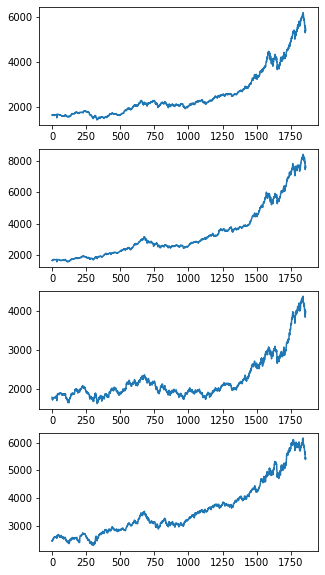

In [5]:
plt.figure(figsize = (5,10)) # 가로5, 세로10인치의 전체 figure를 생성합니다.
plt.subplot(4,1,1) # 가로4칸, 세로1칸, axis 1의 subplot을 생성합니다.
plt.plot(eustockmarkets['DAX']) # EustockMarket 데이터셋에서 'DAX' columns plot을 그립니다.
plt.subplot(4,1,2)
plt.plot(eustockmarkets['SMI'])
plt.subplot(4,1,3)
plt.plot(eustockmarkets['CAC'])
plt.subplot(4,1,4)
plt.plot(eustockmarkets['FTSE'])
plt.show() # 그린 플롯을 보여줍니다.

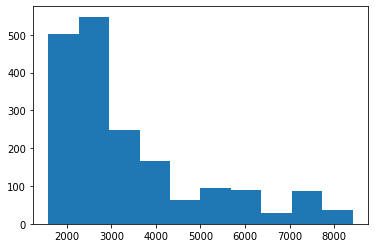

In [6]:
# DAX columns 히스토그램 생성 
plt.hist(eustockmarkets['SMI'])
plt.show()

In [7]:
print(eustockmarkets['SMI'])
print('--' * 20)

diff = eustockmarkets['SMI'].diff() # 각 인덱스의 요소끼리의 차이를 계산합니다.
print(diff) # 바로 위에 출력된 값과 diff 변수에서 나온 출력값의 차이를 비교해보세요.

0       1678.1
1       1688.5
2       1678.6
3       1684.1
4       1686.6
         ...  
1855    7721.3
1856    7447.9
1857    7607.5
1858    7552.6
1859    7676.3
Name: SMI, Length: 1860, dtype: float64
----------------------------------------
0         NaN
1        10.4
2        -9.9
3         5.5
4         2.5
        ...  
1855   -231.6
1856   -273.4
1857    159.6
1858    -54.9
1859    123.7
Name: SMI, Length: 1860, dtype: float64


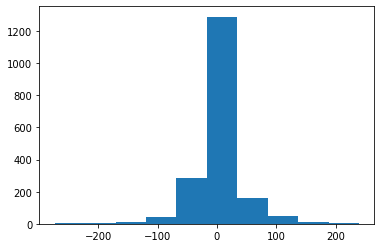

In [8]:
# 차분이 적용된 DAX 히스토그램 생성 
plt.hist(diff)
plt.show()

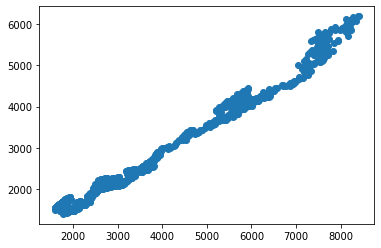

In [9]:
# SMI와 DAX를 비교한 산점도
plt.scatter(eustockmarkets['SMI'], eustockmarkets['DAX'])
plt.show()

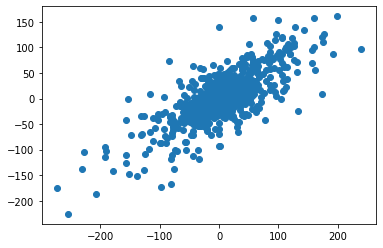

In [11]:
# 차분이 적용된 SMI와 DAX를 비교한 산점도
plt.scatter(eustockmarkets['SMI'].diff(), eustockmarkets['DAX'].diff())
plt.show()

# 시계열 데이터
* 특정 시점의 값 (Xt)가 다른 시점의 값과 특정한 방식으로 연관을 가짐 (시계열, 서로 연관된 값들을 관계를 파악하는 것)
* 어떤 확률 과정 (Stochastic process)를 따르는 시계열이 있다고 가정하고, 통계적 과정으로부터 나타난 표본(sample)을 통하여 알아보자
* 정상성은 관련된 과정 중 하나임

## 정상성이란?
* 어떤 시계열이 정상적이고, 어떤 시계열은 비정상적인가?
* 시간과 상관 없이 일정한 성질을 띄는 것
1) 강 정상성 - 모든 적률 (moment)이 시간과 무관하게 일정함, 대부분의 강 정상성을 만족하는 시계열은 약 정상성도 만족 -> 기저를 이루는 확률 분포. '언제나 같음 (현실적으로 어려움, 약 정상성이 많이 쓰이는 이유)
2) 약 정상성 - 임의의 t (t시점)에서 관찰하더라도 확률 과정의 성질 E(Xt), Var(Xt)는 변하지 않음

# 용어 설명

* 사인함수(Sine function) - 삼각함수는 직각삼각형의 밑각에 삼각비를 대응시킨 함수입니다. 그중 sin은 직각삼각형 두 변의 길이 중 빗변과 높이의 길이의 비 입니다.
* 변수(Variable) - 데이터(data)를 저장하기 위해 프로그램에 의해 이름을 할당받은 메모리 공간을 의미합니다. 즉, 변수란 데이터(data)를 저장할 수 있는 메모리 공간을 의미하며, 이렇게 저장된 값은 변경될 수 있습니다.
* 허위 상관(Spurious correlation) - 두 개 이상의 변수가 통계적 상관은 있지만 인과관계가 없는 관계를 말합니다.
* 자기 상관 함수(AutoCorrelation Function) - x축은 시차(lag), y축은 자기상관(autocorrelation)을 나타냅니다. 시차가 0일 때, 자기상관은 항상 1의 값을 가집니다. 파란색 점선은 임계값으로 95% 신뢰구간으로 추정되는 표준편차를 의미합니다. 파란 임계값 안에 들어가는 선들은 통계적으로 중요하지 않습니다.
* 부분(편)자기 상관 함수(Partial AutoCorrelation Function) - x축은 시차(lag), y축은 부분 자기상관(Partial autocorrelation)을 나타냅니다.

## ① ACF(AutoCorrelation Function) Plot

* 자기 상관 함수는 시간에 따른 상관 정도를 나타내기 위해 사용하는 통계량을 나타냅니다.
* 자기 상관: 시계열 데이터에서 일정 간격이 있는 값들 사이의 상관관계를 의미합니다 
        * (특히 시계열에서는 한 시점에서 다른 시점 간의 상간 관계가 중요하기 때문임 - t, t1, t2 간의 상관관계를 찾는 것이 중요함)

## ② PACF(Partial AutoCorrelation Function) Plot

- 편자기 상관 함수는 두 시점 사이의 상관관계를 보려고 하는 경우 시점의 영향을 주는 요소들을 제외한 상관관계를 볼때 사용합니다.- 
- 편자기상관: 자신에 대한 그 시차의 편상관을 의미합니다 (두 시점사이의 전체 상관관계에서 그 사이 다른 시점의 조건부 상관관계를 뺀 것입니다)
- 즉, 자기 자신에 대한 그 시차의 편상관을 의미 (두 시점 사이의 전체 상관관계에서 그 사이 다른 시점의 조건부 상관관계를 뺀 것
- 불 필요한 중복 관계를 제거해 나가는 것을 VISUalisation, but 일정 기간이 지나면 유의미한 결과를 찾기 힘듬 (acf와 pacf의 차이)

## ③ 시계열 데이터 EDA

* 사인함수를 ACF와 PACF에 적용하였을 때 변화를 확인할 수 있습니다.

## ④ Non-stationary 데이터의 ACF 및 PACF
* 의미적 차이 
- ACF의 경우 두 시점간의 상관관계를 계산할 때 두 시점 사이의 모든 lag에 대한 정보가 들어갑니다.
- PACF는 오로지 두 시점만의 상관관계만을 계산합니다. (다른 lag는 조건부 상관관계로 제거)


사인함수가 아닌 1~100까지 선형적으로만 증가하는 값을 적용하였기 때문에 별다른 변화를 확인할 수 없습니다.

# 시계열 데이터 EDA
# 직접 사인함수를 만들고 ACF와 PACF에 적용하여 시각화된 결과를 확인해봅시다.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # statsmodels은 통계 모델 추정, 통계 결과, 통계 데이터 탐색을 지원하는 python 모듈입니다.

In [14]:
x = np.array(range(100)) # 0~99까지 생성
y = np.sin(x + np.pi/3) # X에 0부터 99까지 할당하고, 이를 numpy.sin에 통과시키면 사인 함수 값이 도출됩니다.

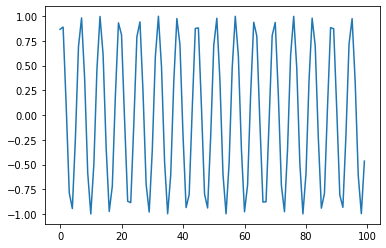

In [15]:
plt.plot(y)
plt.show()

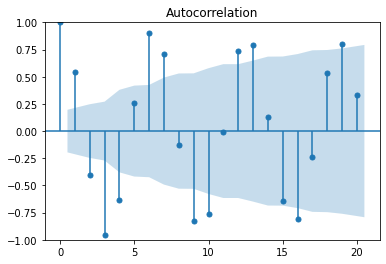

In [16]:
plot_acf(y)
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


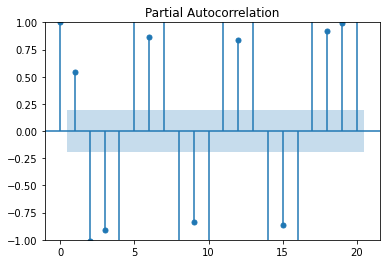

In [17]:
plot_pacf(y)
plt.show()

## 시계열 EDA에서 체크해야할 가장 중요한 위험은 ‘허위 상관’ (spurious correlation)이며 이것은 두 개 이상의 변수가 통계적 상관은 있지만 인과관계가 없는 관계를 말합니다.

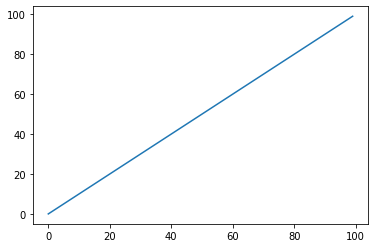

In [19]:
plt.plot(x) 
plt.show()

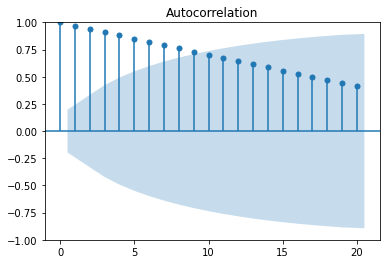

In [20]:
plot_acf(x) 
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


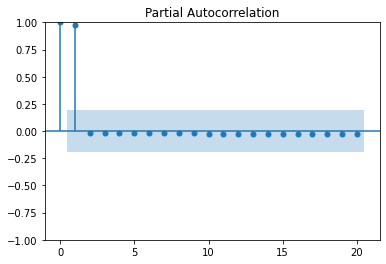

In [21]:
plot_pacf(x)
plt.show()

## 📊 머신러닝 vs 시계열 분석: 핵심 차이점

| 항목 | **머신러닝** | **시계열 분석** |
| --- | --- | --- |
| **기본 개념** | 데이터에서 패턴을 학습해 일반화된 모델 생성 | 시간 순서에 따라 관측된 데이터를 분석 |
| **시간 요소** | 시간은 하나의 피처(feature)일 뿐 | 시간의 흐름 자체가 핵심 |
| **데이터 전제** | 일반적으로 독립 샘플 가정 | 이전 시점과 현재 시점이 **의존적** |
| **모델 예시** | Decision Tree, Random Forest, XGBoost, Neural Network | ARIMA, SARIMA, ETS, Exponential Smoothing |
| **입력 형태** | 여러 feature의 조합 (ex: 나이, 성별, 상품 정보 등) | 보통 단일 또는 소수의 시계열 데이터 |
| **예측 대상** | 범주(class), 수치(regression) 등 | 미래의 시간 기반 수치 예측 |
| **전처리 중요 요소** | 결측치, 이상치, 정규화 등 | **정상성(Stationarity)**, 계절성 제거 등 |
| **성능 평가** | Accuracy, F1, MSE, AUC 등 다양 | RMSE, MAPE, ACF/PACF 분석 등 |

![image.png](attachment:7044b612-5fa3-46a3-898f-e70f8c37aa17:image.png)

## 🔧 결합도 가능하다

실제로 많은 현실 문제에서는 **두 접근 방식을 혼합**하여 사용합니다.

예:

- **Prophet + 머신러닝**
- **LSTM (Recurrent Neural Network)**: 시간 흐름을 반영하는 딥러닝 기반 모델
- **시계열 특징(트렌드, 계절성, 이동평균 등)을 머신러닝 feature로 사용**

![image.png](attachment:fc85c7cb-d83a-4a69-acf0-7360c5e353e4:image.png)

## 💼 실무 적용 사례 차이

| 분야 | 시계열 분석 | 머신러닝 |
| --- | --- | --- |
| **재무·경제** | - 주가, 환율, 금리 예측 (ARIMA, GARCH 등)- 경기 순환 분석 | - 신용 위험 평가- 사기 거래 탐지 (이상 탐지)- 주가 방향성 예측 (ML 분류) |
| **제조·설비** | - 센서 데이터 기반 예지보전 (이상 탐지)- 장비 이상 시점 예측 | - 고장 분류 (정상/비정상)- 품질 예측 (회귀 모델)- 조치 추천 시스템 |
| **소매·마케팅** | - 일별/주별 매출 예측- 수요 예측 (Prophet, Holt-Winters) | - 고객 이탈 예측- 타겟 마케팅 추천- 고객 세분화 (클러스터링) |
| **물류·공급망** | - 재고 수준 예측- 운송 시간 분석 | - 최적 경로 탐색- 수요에 따른 공급 계획 추천 |
| **에너지** | - 전력 소비량 예측 (시간 기반, 계절성 중요) | - 건물 유형별 에너지 사용 패턴 학습- 이상 사용 패턴 탐지 |
| **헬스케어** | - 환자 바이탈 데이터 시계열 분석- 약물 반응 시간 추이 | - 질병 분류- 영상 기반 진단- 개인화된 치료 추천 |
| **IT 시스템 로그** | - 시스템 부하 예측 (CPU 사용률, 트래픽 등) | - 사용자 행동 예측- 에러 유형 분류- 자동 장애 원인 분석 |

![image.png](attachment:e97b6dcb-2317-426f-873f-41a6cf89858e:image.png)

## 💡 둘을 같이 쓰는 예

> 매출 예측 모델
> 
- 시계열 분석으로 **기본 추세와 계절성** 예측
- 머신러닝으로 **프로모션, 날씨, 경쟁사 가격 등의 외부 변수 반영**
    
    → 예측 정확도 향상
    

### 시계열 분석 모델 vs 머신 러닝 모델

| 구분 | **시계열 분석 모델 (Time Series Models)** | **머신 러닝 모델 (Machine Learning Models)** |
| --- | --- | --- |
| **주요 모델** | AR, MA, ARIMA, SARIMA, Exponential Smoothing 등 | Decision Tree, Random Forest, XGBoost, SVM, Neural Network 등 |
| **시간 정보 활용** | 시계열 데이터의 **시간 순서**를 **내재적으로 반영** | 시간 정보는 **명시적으로 feature로 추가**해야 함 (예: lag, rolling mean) |
| **데이터 전제 조건** | 정상성(Stationarity), 자기상관 등 **통계적 전제조건** 존재 | 전제 조건은 상대적으로 적음, **비정상 데이터도 처리 가능** |
| **모델 해석력** | 모델 구조가 간단하고 해석 용이 (ex. AR(1): 바로 직전값만 사용) | 복잡한 구조 (특히 앙상블/딥러닝), 해석이 어려운 경우 많음 |
| **시계열 성분 처리** | 추세, 계절성, 노이즈 등을 분리하고 모델링 | 트렌드/계절성은 직접 feature로 설계해야 함 |
| **예측 방식** | 순차적으로 예측 (하나씩 예측, 예: t+1, t+2...) | 한번에 여러 시점 예측 가능 (멀티 아웃풋 설계 가능) |
| **성능** | 데이터가 적고 패턴이 명확할 때 우수 | 데이터가 많고 복잡한 패턴일수록 우수 |
| **적용 예시** | 금융시계열, 수요예측, 기상 데이터 등 | 다양한 시계열 응용 (가격예측, 이상탐지, 사용자 행동 예측 등) |